In [58]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#data = r"C:\Users\isaac\Documents\groceries - groceries.csv"
data = r"/mnt/c/Users/isaac/Documents/groceries - groceries.csv"
df = pd.read_csv(data)
item_columns = df.columns[1:]
processed_df = df[item_columns][df['Item(s)'] > 1]
processed_df = processed_df.fillna(0)

list_of_row_values = []
for i in processed_df.to_dict('records'):
    list_of_row_values.append([value for value in i.values()])

cleaned_list_of_row_values = []
for list in list_of_row_values:
   new_list = [item for item in list if item !=0]
   cleaned_list_of_row_values.append(new_list)

all_items = []
for list in list_of_row_values:
   for item in list:
      if item != 0:
        all_items.append(item)

unique_items=[]
for item in all_items:
    if item not in unique_items:
        unique_items.append(item)

The following code counts how many times each pair appears throughout all of the market baskets.
A dictionary is made with the item pair as key and its count as value.
Let's do this for two sets: one with pairs of the same item - i.e. milk and milk, or apples and apples- and one with only pairs of different items- i.e milk and apples or tea and milk

In [59]:
item_combos2 = [a for a in itertools.combinations_with_replacement(unique_items, 2)]
different_item_combos = [a for a in itertools.combinations(unique_items, 2)]

def make_dict_with_combos_and_counts (list_of_combos):
    count_of_combos={}
    for a,b in list_of_combos:
        counter = 0
        for bag in cleaned_list_of_row_values:
            if a in bag and b in bag:
                counter +=1
        count_of_combos[a,b] = counter
    return count_of_combos

count_of_combos = make_dict_with_combos_and_counts (item_combos2)
different_count_of_combos = make_dict_with_combos_and_counts (different_item_combos)

I sort dictionaries by their values (not keys)
Source: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value 

Then, in order to prepare for plotting in MatplotLib, I decompose the item pair tuple into a string so that it can be added to a list, then to a series.

In [60]:
def dict_to_series(sample_dict):

    sorted_dict = dict(sorted(sample_dict.items(), key=lambda item: item[1], reverse=True))

    temp_keys_list=[]
    for a, b in sorted_dict.keys():
        temp_keys_list.append(f'{a}-{b}')           # decompose tuple to a string
    sorted_keys_series = pd.Series(temp_keys_list)

    sorted_values_series = pd.Series(\
    [count for count in sorted_dict.values()])
    
    return sorted_keys_series, sorted_values_series

grocery_items, counts = dict_to_series(count_of_combos)
different_grocery_items, different_counts = dict_to_series(different_count_of_combos)


Here, I check to make sure the length of the combinations without replacemtns is the same as the length of the combinations with replacements

In [61]:

len(different_count_of_combos)

14196

In [62]:
no_repeats=[]
for a,b in count_of_combos.keys():
    if a != b:
        no_repeats.append((a,b))
len(no_repeats)

14196

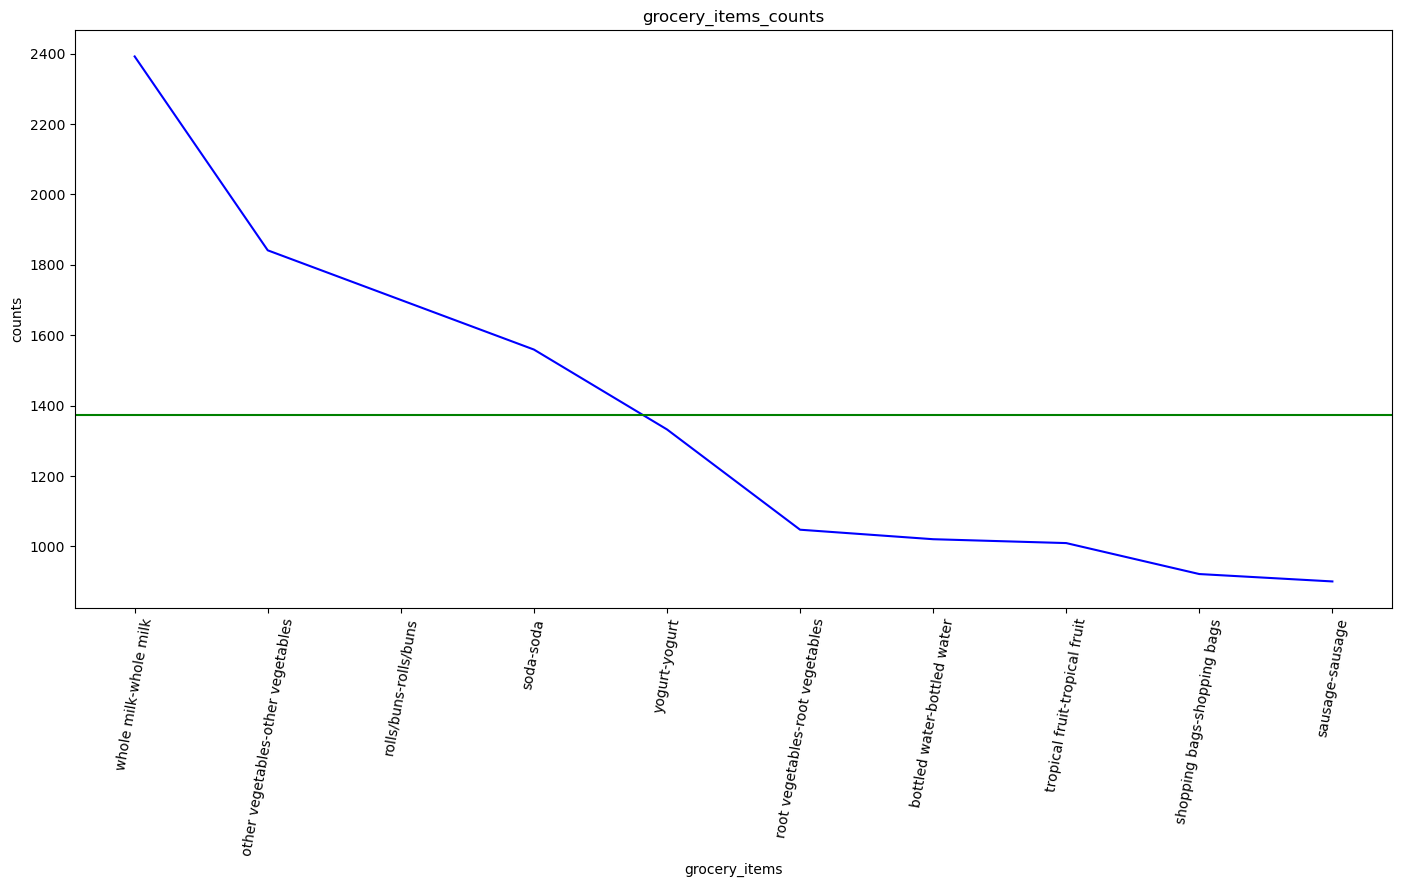

In [63]:

plt.figure(figsize=(17,7.5))
plt.plot(grocery_items[:10], counts[:10], color = 'blue')
plt.xlabel('grocery_items')
plt.ylabel('counts')
plt.title('grocery_items_counts')
plt.xticks(grocery_items[:10])

plt.axhline(y = counts[:10].mean(), color = 'green')

plt.xticks(rotation = 80)
plt.show()

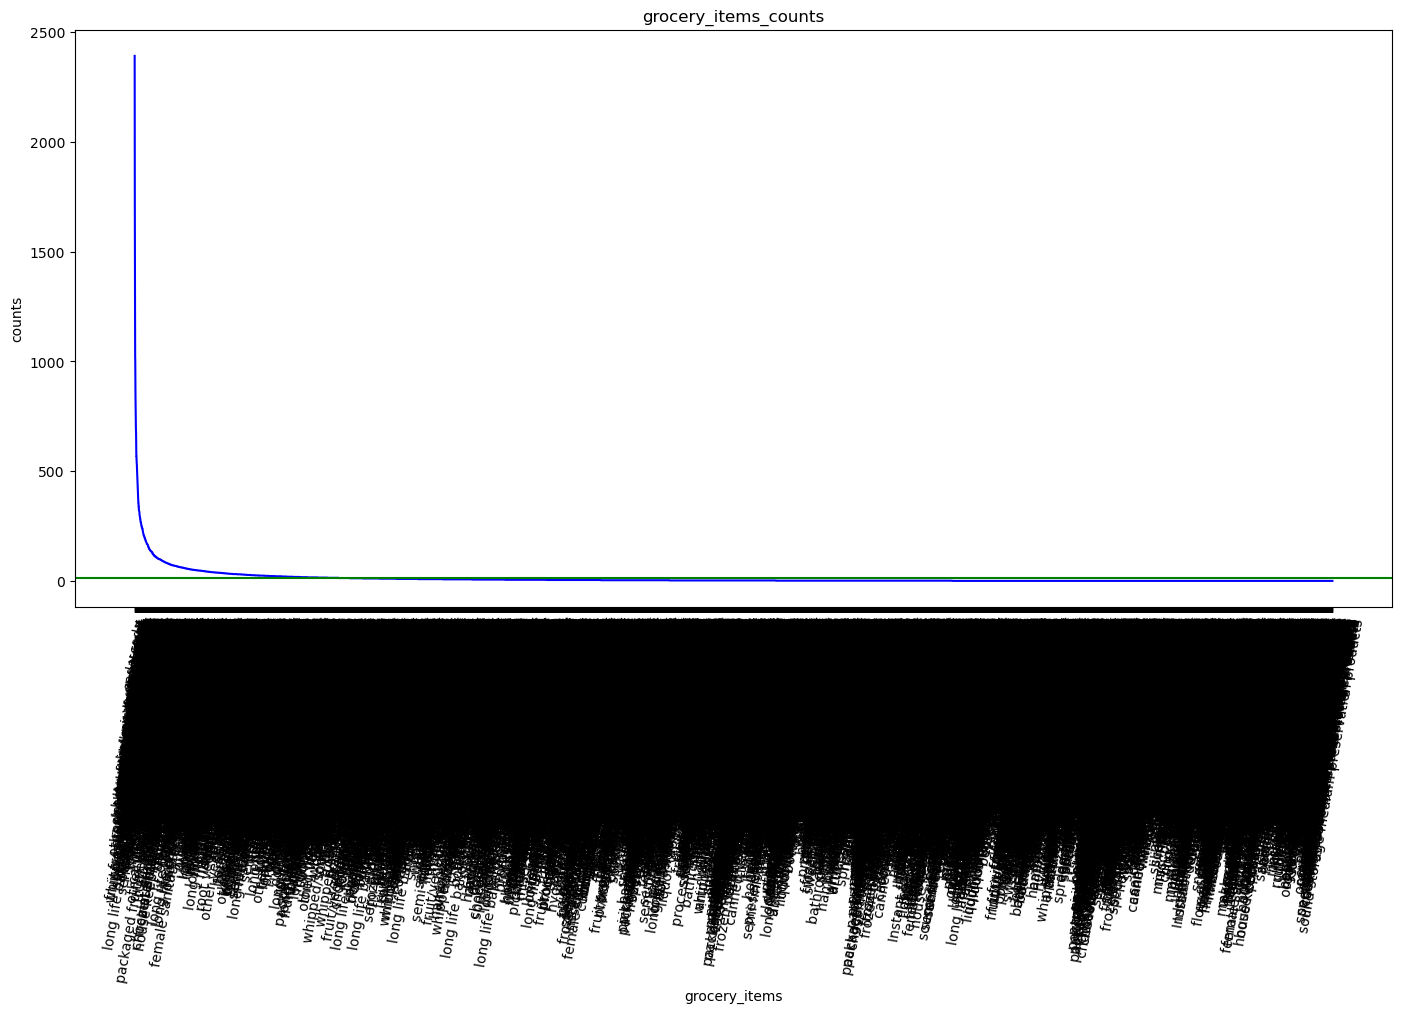

In [64]:

plt.figure(figsize=(17,7.5))
plt.plot(grocery_items, counts, color = 'blue')
plt.xlabel('grocery_items')
plt.ylabel('counts')
plt.title('grocery_items_counts')
plt.xticks(grocery_items)

plt.axhline(y = counts.mean(), color = 'green')

plt.xticks(rotation = 80)
plt.show()

Lets determine which counts are statistically significant. We will find the mean, the standard deviation (SD), and how far from the mean each count is in terms of the SD

In [65]:
mean_counts = np.mean([count for count in count_of_combos.values()])
std_counts = np.std([count for count in count_of_combos.values()])
pd.DataFrame( {'Mean': np.mean([count for count in count_of_combos.values()]), 'Standard Deviation' : np.std([count for count in count_of_combos.values()]) }, index=[i for i in range(1)])

,Mean,Standard Deviation
0,12.425061,53.736761


In [66]:
counts

0        2392
1        1841
2        1700
3        1559
4        1332
         ... 
14360       0
14361       0
14362       0
14363       0
14364       0
Length: 14365, dtype: int64

In [67]:
three_stds = []
four_stds = []
five_stds = []
six_stds = []
for i in range(len(count_of_combos)):
    if abs((counts[i] - mean_counts )/std_counts) > 6:
        six_stds.append(grocery_items[i])
    elif abs((counts[i] - mean_counts )/std_counts) > 5:
        five_stds.append(grocery_items[i])
    elif abs((counts[i] - mean_counts )/std_counts) > 4:
        four_stds.append(grocery_items[i])
    elif abs((counts[i] - mean_counts )/std_counts) > 3:
        three_stds.append(grocery_items[i])
len(six_stds), len(five_stds), len(four_stds)

(50, 19, 29)

After visualizing, it is clear I have too many pairs. 

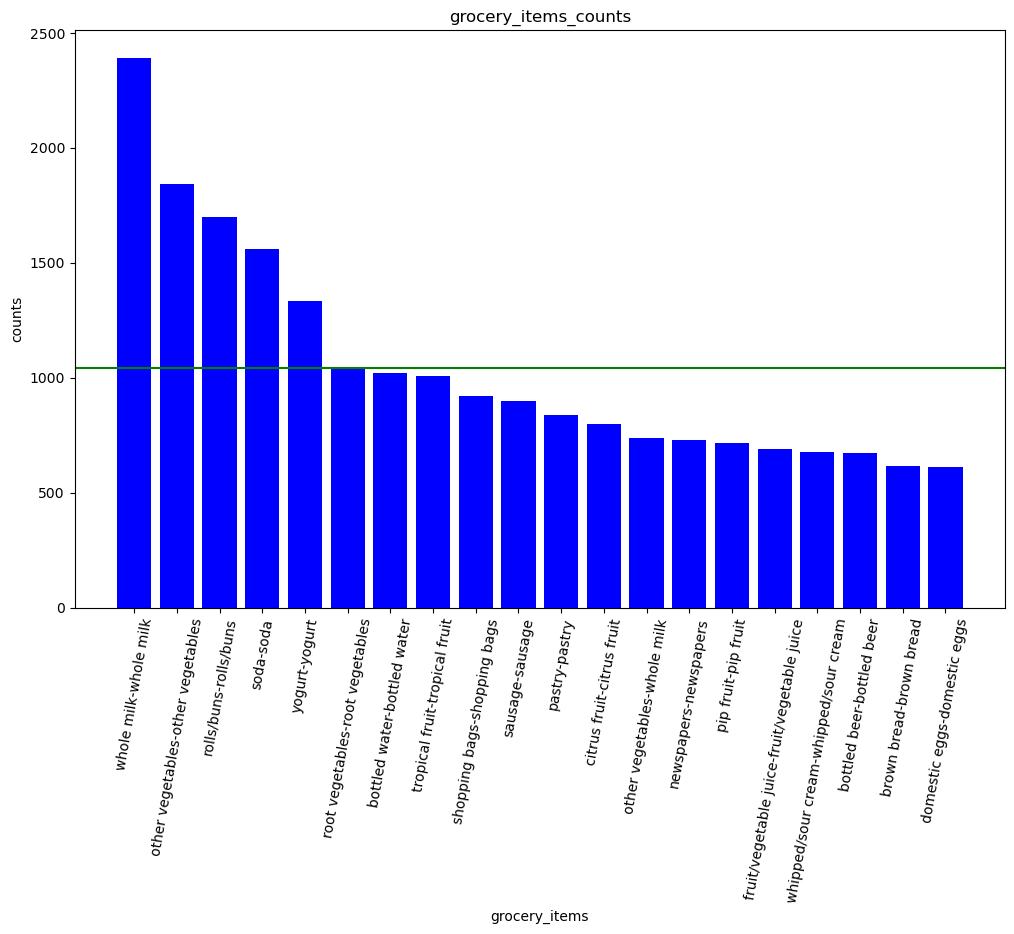

In [71]:

plt.figure(figsize=(12,7.5))
plt.bar(sorted_items_series[:20], sorted_counts_series[:20], color = 'blue')
plt.xlabel('grocery_items')
plt.ylabel('counts')
plt.title('grocery_items_counts')
plt.xticks(sorted_items_series[:20])

plt.axhline(y = sorted_counts_series[:20].mean(), color = 'green')

plt.xticks(rotation = 80)
plt.show()



Let's try visualize the top 10 most frequent appearing item pairs

#### Interestingly, the top 20 are all pairs of the same items EXCEPT for other vegetables and whole milk, the 13th most purchased pair

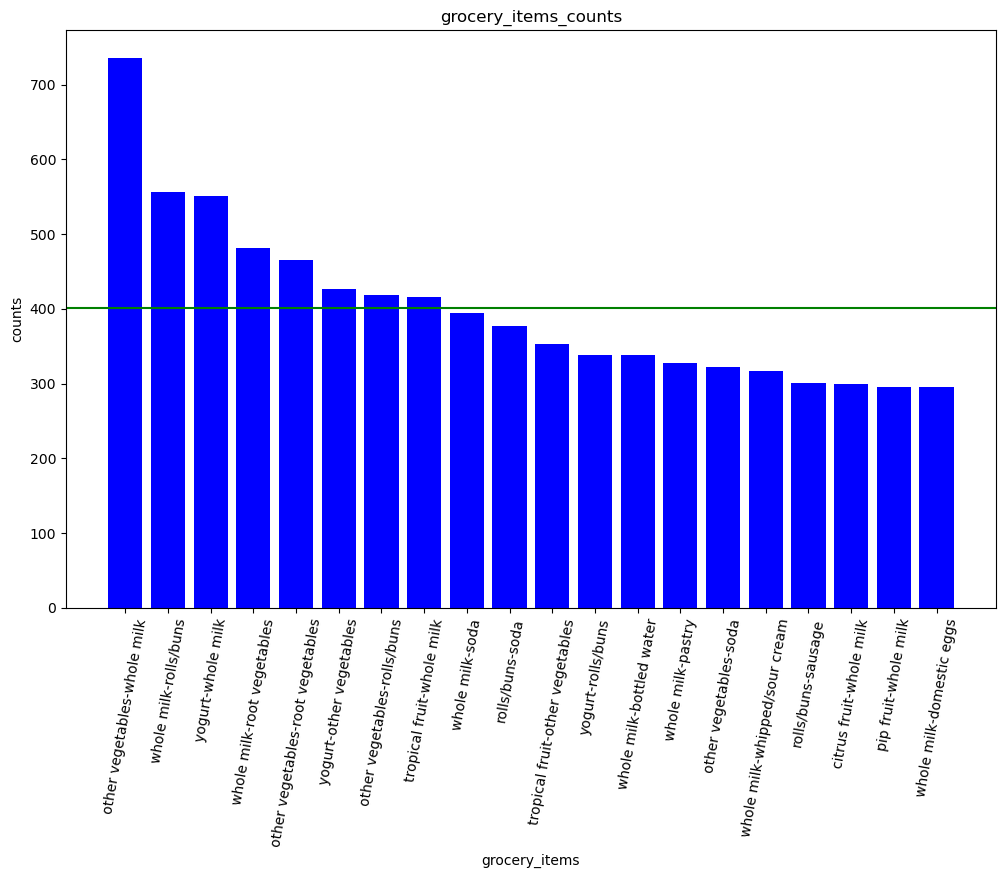

In [69]:

plt.figure(figsize=(12,7.5))
plt.bar(different_grocery_items[:20], different_counts[:20], color = 'blue')
plt.xlabel('grocery_items')
plt.ylabel('counts')
plt.title('grocery_items_counts')
plt.xticks(different_grocery_items[:20])

plt.axhline(y = different_counts[:20].mean(), color = 'green')

plt.xticks(rotation = 80)
plt.show()

In order to get a sense of the distribution of  counts, I created a new dictionary.
Here, the keys are the counts and the values are the number of item pairs that have that count.
For example, the key 1 refers to pairs that only show up once. However, this analysis revealed that
21% of the pairs only show up once.

In [97]:
percentile_dict={}
already_counted = []
for i in count_of_combos.values():
    counter = 0
    if i not in already_counted:
        for j in count_of_combos.values():
            if i == j:
                counter +=1
        already_counted.append(i)
        percentile_dict[i] = (counter/len(count_of_combos.values()))
        #percentile_dict[i] = (counter/len(count_of_combos.values())) * 100

sorted_percentile_dict = {key:percentile_dict[key] for key in sorted(percentile_dict)}

In [ ]:
#Checking to make sure I'm comnputing expected value correctly
print(pd.Series([key*value for key,value in sorted_percentile_dict.items()]).sum())

products = []
keys = [count for count in sorted_percentile_dict.keys()]
values = [frequency for frequency in sorted_percentile_dict.values()]
for i in range(len(sorted_percentile_dict)):
    products.append(keys[i]*values[i])
print(sum(products))

12.42506091193874
12.42506091193874


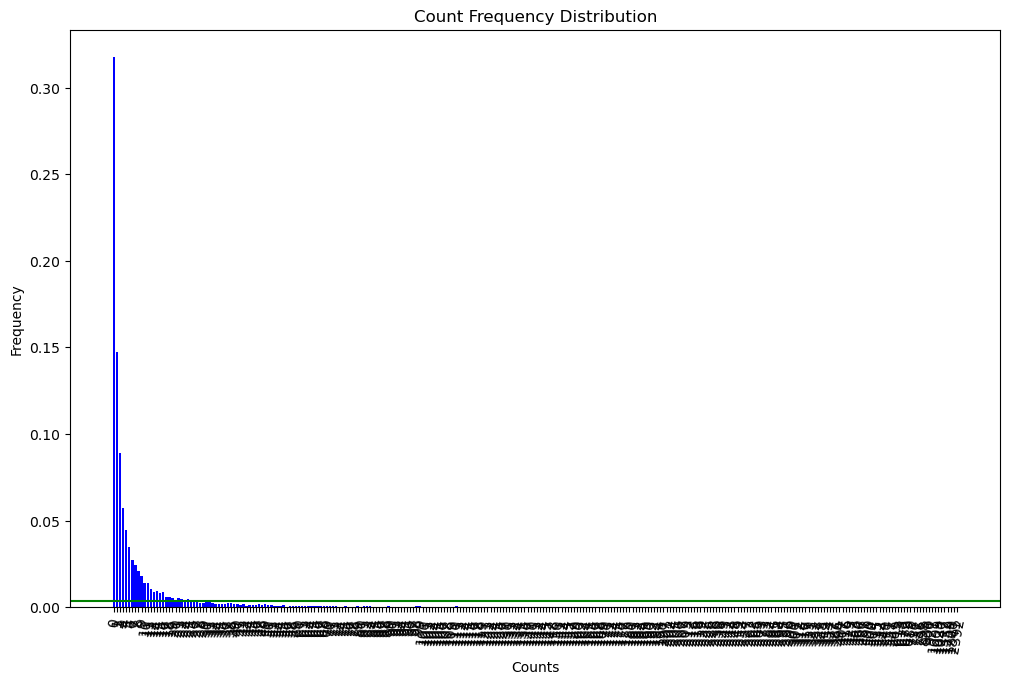

In [105]:
# Use f string syntax to turn the x-axis values into strings so that they aren't spaced out by their int values
plt.figure(figsize=(12,7.5))
plt.bar(pd.Series([f'{count}' for count in sorted_percentile_dict.keys()]), pd.Series([frequency for frequency in sorted_percentile_dict.values()]) , color = 'blue')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Count Frequency Distribution')
plt.xticks(pd.Series([f'{count}' for count in sorted_percentile_dict.keys()]))

plt.axhline(y = pd.Series([frequency for frequency in sorted_percentile_dict.values()]).mean(), color = 'green')
#plt.axhline(y = pd.Series([key*value for key,value in sorted_percentile_dict.items()]).sum(), color = 'green')

plt.xticks(rotation = 80)
plt.show()

Around 21% of pairs only appear once. Next, make a histogram to visualize how often pair counts appear

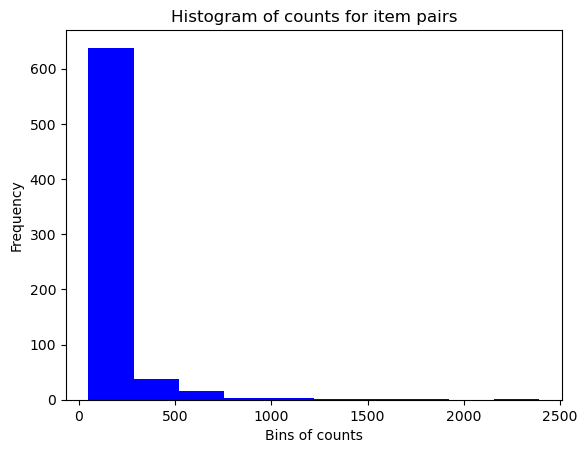

In [ ]:
plt.figure()
# We can also do plt.figure(figsize=(12,8)) if needed

# Create the histogram
plt.hist([num for num in clean_dict.values() if num >50], bins = 10, color = "blue")
# Setting the number of bins to 10 is optional here

# Add labels (optional)
plt.xlabel('Bins of counts')
plt.ylabel('Frequency')

# Add a title
plt.title('Histogram of counts for item pairs')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import itertools

data = r"C:\Users\isaac\Documents\groceries - groceries.csv"

def process_data(data):
    # Load the DataFrame
    df = pd.read_csv(data)

    # Clean up column names by stripping any extra spaces
    df.columns = df.columns.str.strip()

    # Make a list of item column names
    columns_as_string = "Item 1	Item 2	Item 3	Item 4	Item 5	Item 6	Item 7	Item 8	Item 9	Item 10	Item 11	Item 12	Item 13	Item 14	Item 15	Item 16	Item 17	Item 18	Item 19	Item 20	Item 21	Item 22	Item 23	Item 24	Item 25	Item 26	Item 27	Item 28	Item 29	Item 30	Item 31	Item 32"
    columns_as_list = columns_as_string.split('\t')

    # Check if all expected column names exist in the dataframe
    missing_columns = [col for col in columns_as_list if col not in df.columns]
    if missing_columns:
        print(f"Warning: The following expected columns are missing: {missing_columns}")
    
    # Only include rows where item count, the first column, is two or more
    processed_df = df.loc[df.iloc[:, 0] > 2]

    # Make new columns for each possible column combination
    item_column_combinations = itertools.combinations(columns_as_list, 2)

    for column_a, column_b in item_column_combinations:
        if column_a in processed_df.columns and column_b in processed_df.columns:
            processed_df[f'{column_a}_and_{column_b}_pair'] = (
                processed_df[column_a].astype(str) + '-' + processed_df[column_b].astype(str)
            )

    # Drop individual item columns, leaving only our item combo columns
    processed_df.drop(columns=columns_as_list, inplace=True, errors='ignore')

    # Extract unique items from the original columns
    unique_items = set()
    for col in columns_as_list:
        # Exclude placeholders like "0" or NaN
        unique_items.update(df[col].dropna().loc[df[col] != "0"].astype(str).unique())

    return processed_df, list(unique_items)

def check(processed_df, column_name, item_a, item_b):
    # Check if either "item_a-item_b" or "item_b-item_a" exists in the column
    pair_1 = f"{item_a}-{item_b}"
    pair_2 = f"{item_b}-{item_a}"
    return pair_1 in processed_df[column_name].values or pair_2 in processed_df[column_name].values

# Process the data
processed_df, unique_items = process_data(data)

# Loop through all unique combinations of items
for item_a, item_b in itertools.combinations(unique_items, 2):
    all_not_found = True  # Initialize flag to True for each pair
    
    # Check across all columns in the processed dataset
    for column_name in processed_df.columns:
        if check(processed_df, column_name, item_a, item_b):
            # If pair is found in the current column, set flag to False
            all_not_found = False
            break  # No need to check further if pair is found
    
    # If the pair is not found in any column, print a message
    if all_not_found:
        print(f"{item_a}, {item_b} not found in data")
